# Exercise Set 7: Data structuring  3

*Morning, August 16, Morning*

In this Exercise Set we finalize our work with the weather data we started working on in Exercise Set 4. We will also study a dataset of traffic data from Copenhagen to iterate through the pandas workflow once more. 

In [1]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6


## Exercise Section 7.1: Weather data, part 3
We continue with the final part of three exercises on structuring weather data. In this exercise you must use the function for fetching and structuring weather data which you made in Exercise 6.1.5.

> **Ex. 7.1.1:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ in 1864. 

> *Hint*: the method `describe` computes all these measures.

In [ ]:
# [Answer to Ex. 7.1.1]

# This will be in assignment 1

> **Ex. 7.1.2:** Get the processed data from years 1864-1867 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically. 

In [ ]:
# [Answer to Ex. 7.1.2]

# This will be in assignment 1

> **Ex. 7.1.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1864-1867.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [ ]:
# [Answer to Ex. 7.1.3]

# This will be in assignment 1

## Exercise Section 7.2: Traffic data in Copenhagen

In this second part of exercise set 7 you will be working with traffic data from Copenhagen Municipality.

The municipality have made the data openly available through the [opendata.dk](http://www.opendata.dk/) platform. We will use the data from traffic counters to construct a dataset of hourly traffic. We will use this data to get basic insights on the development in traffic over time and relate it to weather. The gist here is to practice a very important skill in Data Science: being able to quickly fetch data from the web and structure it so that you can work with it. Scraping usually gets a bit more advanced than what we will do today, but the following exercises should give you a taste for how it works. The bulk of these exercise, however, revolve around using the Pandas library to structure and analyze data.

### Part 7.2.a: getting some data to work with

Hence follows a simple scraping exercise where you (1) collect urls for datasets in the webpage listing data on traffic counters and (2) use these urls to load the data into one dataframe.

> **Ex. 7.2.1:** Using the requests module, extract the html markup of the webpage data.kk.dk/dataset/faste-trafiktaellinger and store it as a string in a new variable.

In [5]:
# [Answer to Ex. 7.2.1]

from requests import get 

url = 'https://data.kk.dk/dataset/faste-trafiktaellinger'
resp = get(url)

html = resp.text

> **Ex. 7.2.2:** Using the re module, extract a list of all the urls in the html string and store them in a new variable.

> _Hint:_ Try using the re.findall method. You may want to Google around to figure out how to do this. Protip: searching for something along the lines of "extract all links in html regex python" and hitting the first StackOverflow link will probably get you farther than reading elaborate documentation.

In [6]:
# [Answer to Ex. 7.2.2]

import re 

rehits = re.findall(r'href=[\'"]?([^\'" >]+)', html)

> **Ex. 7.2.3:** Create a new variable that only contains the links that point to downloadable traffic data sheets. 

> _Hint:_ You want to filter the results from above. For example to only include urls with the term 'download' in them.

In [7]:
# [Answer to Ex. 7.2.3]

datalinks = [url for url in rehits if 'download' in url]

> **Ex. 7.2.4:** Using pd.read_excel method, load the datasets into a list. Your resulting variable should hold a list of Pandas dataframes.

> _Hint:_ you may want to set the skiprows= keyword argument. 

In [8]:
# [Answer to Ex. 7.2.4]

data = [pd.read_excel(url, skiprows = 10) for url in datalinks]

> **Ex. 7.2.5:** Merge the list of dataframes into a single dataframe.

In [9]:
# [Answer to Ex. 7.2.5]

final_data = pd.concat(data)

### Part 7.2.b Structuring your data

If you successfully completed the previous part, you should now have a dataframe with about 183.397 rows (if your number of rows is close but not the same, worry not—it matters little in the following). Well done! But the data is still in no shape for analysis, so we must clean it up a little.

161.236 rows (and 30 columns) is a lot of data. ~3.3 MB by my back-of-the-envelope calculations, so not "Big Data", but still enough to make your CPU heat up if you don't use it carefully. Pandas is built to handle fairly large dataframes and has advanced functionality to perform very fast operations even when the size of your data grows huge. So instead of working with basic Python we recommend working pandas built-in procedures as they are constructed to be fast on dataframes.

Nerd fact: the reason pandas is much faster than pure Python is that dataframes access a lower level programming languages (namely C, C++) which are multiple times faster than Python. The reason it is faster is that it has a higher level of explicitness and thus is more difficult to learn and navigate.

> **Ex. 7.2.6:** Reset the row indices of your dataframe so the first index is 0 and the last is whatever the number of rows your dataframe has. Also drop the column named 'index' and the one named `Spor`.

In [10]:
# [Answer to Ex. 7.2.6]

final_data = final_data\
        .reset_index()\
        .drop(['index', 'Spor'], axis = 1)

> **Ex. 7.2.7:** Rename variables from Danish to English using the dictionary below.

```python 
dk_to_uk = {
    'Vejnavn':'road_name',
    '(UTM32)':'UTM32_north',
    '(UTM32).1':'UTM32_east',
    'Dato':'date',
    'Vej-Id':'road_id'
}
```

In [11]:
# [Answer to Ex. 7.2.7]

dk_to_uk = {
    'Vejnavn':'road_name',
    '(UTM32)':'UTM32_north',
    '(UTM32).1':'UTM32_east',
    'Dato':'date',
    'Vej-Id':'road_id'
}


final_data = final_data.rename(columns = dk_to_uk)

Python is quite efficient. For example, when you create a new dataframe by manipulating an old one, Python notices that—apart from some minor changes—these two objects are almost the same. Since memory is a precious resource, Python will represent the values in the new dataframe as references to the variables in the old dataset. This is great for performance, but if you for whatever reason change some of the values in your old dataframe, values in the new one will also change—and we don't want that! Luckily, we can break this dependency.

> **Ex. 7.2.8:** Break the dependencies of the dataframe that resulted from Ex. 7.2.7 using the `.copy` method. Delete all other dataframes.

In [12]:
# [Answer to Ex. 7.2.8]

new_data = final_data.copy()

del final_data

Once you have structured appropriately, something that you will want to do again and again is selecting subsets of the data. Specifically, it means that you select specific rows in the dataset based on some column values.

>**Ex. 7.2.9:** Create a new column in the dataframe called total that is True when the last letter of road_id is T and otherwise False.

> _Hint:_ you will need the `pd.Series.str` attribute for this.

In [13]:
# [Answer to Ex. 7.2.9]

new_data['total'] = (new_data.road_id.str[-1] == 'T')

> **Ex. 7.2.10:** Select rows where total is True. Delete all the remaining observations.

In [14]:
# [Answer to Ex. 7.2.10]

total_data = new_data[new_data.total == True]

del new_data

> **Ex. 7.2.11:** Make two datasets based on the lists of columns below. Call the dataset with spatial columns data_geo and the other data.

```python
# Columns for `geo_data`, stored in `geo_columns`
spatial_columns = ['road_name', 'UTM32_north', 'UTM32_east']

# Columns for `data`, stored in `select_columns`
hours = ['kl.{}-{}'.format(str(h).zfill(2), str(h+1).zfill(2)) for h in range(24)]
select_columns = ['road_name', 'date'] + hours
```

In [15]:
# [Answer to Ex. 7.2.11]

# Columns for `geo_data`, stored in `geo_columns`
spatial_columns = ['road_name', 'UTM32_north', 'UTM32_east']

# Columns for `data`, stored in `select_columns`
hours = ['kl.{}-{}'.format(str(h).zfill(2), str(h+1).zfill(2)) for h in range(24)]
select_columns = ['road_name', 'date'] + hours

# selections
data_geo = total_data[spatial_columns]
data  = total_data[select_columns]

del total_data

> **Ex. 7.2.12:** Drop the duplicate rows in data_geo.

In [16]:
# [Answer to Ex. 7.2.12]

data_geo.drop_duplicates(inplace = True)

**Formatting: wide and narrow format**

When talking about two-dimensional data (matrices, tables or dataframes, we can call it many things), we can either say that it is in wide or long format (see explanation here, "wide" and "long" are used interchangably). In Pandas we can use the commands stack and unstack to move between these formats.

The wide format has the advantage that it often requires less storage and is easier to read when printed. On the other hand the long format can be easier for modelling, because each observation has its own row. Turns out that the latter is what we most often need.

> **Ex. 7.2.13:** Turn the dataset from wide to long so hourly data is now vertically stacked. Store this dataset in a dataframe called data. Name the column with hourly information hour_period. Your resulting dataframe should look something like this.

> _Hint:_ pandas' melt function may be of use.

In [17]:
# [Answer to Ex. 7.2.13]

# A bonus info: This function is written using optional type declaration. This
# is used to communicate what type the inputs should be. It doesn't affect the 
# functionality in any way, but it can sometimes increase readability. 

def gather(df: pd.DataFrame, key: str, value: str, cols: list) -> pd.DataFrame:
    """ This helper makes pythons melt() behave like R's gather()
    """
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df, id_vars, id_values, var_name, value_name )

data_long = gather(data, 'hour_period', 'value', hours)

**Categorical data**

Categorical data can contain Python objects, usually strings. These are smart if you have variables with string observations that are long and often repeated, e.g. with road names.

> **Ex. 7.2.14:** Use the `.astype` method to convert the type of the road_name column to categorical.

In [18]:
# [Answer to Ex. 7.2.14]

data_long.road_name = data_long.road_name.astype('category')

### Structure temporal data

Pandas has native support for working with temporal data. This is handy as much 'big data' often has time stamps which we can make Pandas aware of. Once we have encoded temporal data it can be used to extract information such as the hour, second etc.

> **Ex. 7.2.15:** Create a new column called hour which contains the hour-of-day for each row. 

In [19]:
# [Answer to Ex. 7.2.15]

data_long['hour'] = pd.to_datetime(data_long['hour_period'].str[3:5], format = '%H')

>**Ex. 7.2.16:** Create a new column called time, that contains the time of the row in datetime format. Delete the old temporal columns (hour, hour_period, date) to save memory.

> _Hint:_ try making an intermediary series of strings that has all temporal information for the row; then use pandas to_datetime function where you can specify the format of the date string.

In [20]:
# [Answer to Ex. 7.2.16]

data_long['timestamp'] = pd.to_datetime(data_long.date + ' ' + data_long\
                                        .hour\
                                        .dt\
                                        .hour\
                                        .astype(str)\
                                        .apply(lambda x: x.zfill(2)),            
                                        format = '%d.%m.%Y %H')

data_long = data_long.drop(['hour', 'hour_period', 'date'], axis = 1)

> **Ex. 7.2.17:** Using your time column make a new column called weekday which stores the weekday (in values between 0 and 6) of the corresponding datetime.

> _Hint:_ try using the dt method for the series called time; dt has some relevant methods itself.

In [21]:
# [Answer to Ex. 7.2.17]

data_long['weekday'] = data_long.timestamp.dt.weekday

### Statistical descriptions of traffic data

> **Ex. 7.2.18:** Print the "descriptive statistics" of the traffic column. Also show a kernel density estimate of the values.

> _Hint:_ Use the describe method of pandas dataframes for the first task. Use seaborn for the second. 

count    1.256590e+06
mean     7.479317e+02
std      8.210237e+02
min      0.000000e+00
25%      1.300000e+02
50%      4.070000e+02
75%      1.143000e+03
max      1.065800e+04
Name: value, dtype: float64


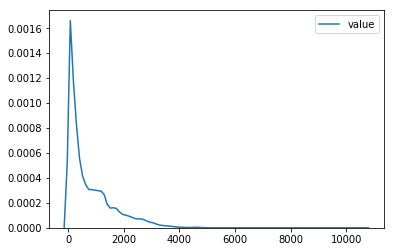

In [22]:
# [Answer to Ex. 7.2.18]

import seaborn as sb

print(data_long.value.describe())

sb.kdeplot(data_long.value.dropna())
plt.show()

> **Ex. 7.2.19:** Which road has the most average traffic?

In [23]:
# [Answer to Ex. 7.2.19]

data_long.groupby('road_name')\
         .value.agg('mean')\
         .reset_index()\
         .sort_values('value', ascending = False)\
         .head(10)

,road_name,value
20,Åboulevard,1830.710335
5,Hareskovvej,1786.806508
2,Fredensbro,1608.545196
12,Roskildevej,1547.680620
9,Kalvebod Brygge,1478.694907
0,Ellebjergvej,1421.176764
15,Torvegade,1166.656219
16,Tuborgvej,1143.289678
18,Vigerslev Allé,867.638906
7,Jagtvej,835.553394


> **Ex. 7.2.20:** Compute annual, average road traffic during day hours (9-17). Which station had the least traffic in 2013? Which station has seen highest growth in traffic from 2013 to 2014?

In [24]:
# [Answer to Ex. 7.2.19]

# create year variable
data_long['year'] = data_long.timestamp.dt.year
data_long['hour'] = data_long.timestamp.dt.hour

# subset relevant years and times 
data_delta = data_long.query("year == 2013 | year == 2014")\
                      .query("hour >= 9 & hour <= 17")

# convert to wide format
data_delta = data_delta[['road_name', 'value', 'year']].groupby(['road_name', 'year'])\
                            .agg('mean')\
                            .reset_index()\
                            .pivot('road_name', 'year', 'value')\
                            .reset_index()

# calculate relative size
data_delta['growth'] = (data_delta[2014]/data_delta[2013] - 1)*100

# show
data_delta.sort_values('growth', ascending = False)



year,road_name,2013,2014,growth
13,Skt. Kjelds Gade,68.003108,82.314091,21.044600
21,Ørestads Boulevard,601.945343,636.221393,5.694213
9,Kalvebod Brygge,2232.019689,2313.241537,3.638940
4,Gadelandet,396.650838,409.561142,3.254828
10,Molbechsvej,226.865948,231.282298,1.946678
3,Frederikssundsvej,961.251268,960.353306,-0.093416
15,Torvegade,1682.839230,1673.113354,-0.577944
11,Mozartsvej,227.591177,225.696151,-0.832645
0,Ellebjergvej,2281.391896,2257.458937,-1.049051
18,Vigerslev Allé,1299.996276,1285.405649,-1.122359
